In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [45]:
df=pd.read_csv('walmart_purchase_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [46]:
# a. What is the average Purchase Price?
average_price = df['Purchase Price'].mean()
print('The average price is :',average_price)



print('The no. of unique companies are : ',df['Company'].nunique())


The average price is : 50.347302
The no. of unique companies are :  8653


In [47]:
# b. What were the highest and lowest purchase prices?
highest_price = df['Purchase Price'].max()
lowest_price = df['Purchase Price'].min()
print('Max puchase Price:',highest_price)
print('Min puchase Price:',lowest_price)

Max puchase Price: 99.99
Min puchase Price: 0.0


In [48]:
# c. How many people have English 'en' as their Language of choice on the website?
english_speakers = df[df['Language'] == 'en'].shape[0]
print("Total Number of English speakers : ",english_speakers)

portugese_speakers = df[df['Language'] == 'pt'].shape[0]
print("Total Number of Portuguese speakers : ",portugese_speakers)

Total Number of English speakers :  1098
Total Number of Portuguese speakers :  1118


In [49]:
# d. What is the email of the person with the following Credit Card Number: 4926535242672853
email = df[df['Credit Card'] == 4926535242672853]['Email'].iloc[0]
print('Email Id :',email)

Email Id : bondellen@williams-garza.com


In [50]:
# e. Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction?
purchase_price = df[df['Lot'] == '90 WT']['Purchase Price'].iloc[0]
print('The Purchase Price for this transaction: ',purchase_price)

The Purchase Price for this transaction:  75.1


In [51]:
# f. How many people have American Express as their Credit Card Provider and made a purchase above $95 ?
amex_big_spenders = df[(df['CC Provider'] == 'American Express') & (df['Purchase Price'] > 95)].shape[0]
print('Amex Big Spenders : ',amex_big_spenders)

Amex Big Spenders :  39


In [52]:
# g. How many people have a credit card that expires in 2025?
expiring_2025 = df[df['CC Exp Date'].apply(lambda x: x.split('/')[1] == '25')].shape[0]
print("Credit Cards Expiring in 2025 : ",expiring_2025)

Credit Cards Expiring in 2025 :  1033


In [53]:
# h. What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) ?
top_email_providers = df['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)
print('The top email providers are : ',top_email_providers)

The top email providers are :  Email
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64


In [54]:
# i. What are the 5 most common Job Titles?
top_jobs = df['Job'].value_counts().head(5)
print('The most job titles are : ',top_jobs)

The most job titles are :  Job
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: count, dtype: int64


In [55]:
# j. How many people made the purchase during morning and evening time?
morning_purchases = df[df['AM or PM'] == 'AM'].shape[0]
evening_purchases = df[df['AM or PM'] == 'PM'].shape[0]
print('The total morning pirchases are : ',morning_purchases)
print('The total evening pirchases are : ',evening_purchases)

The total morning pirchases are :  4932
The total evening pirchases are :  5068


<Axes: xlabel='Purchase Price'>

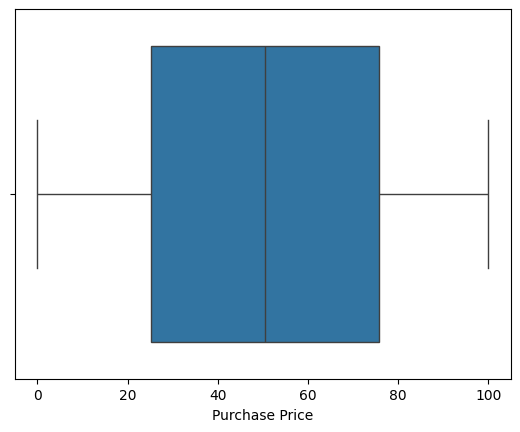

In [60]:
sns.boxplot(x=df['Purchase Price'])

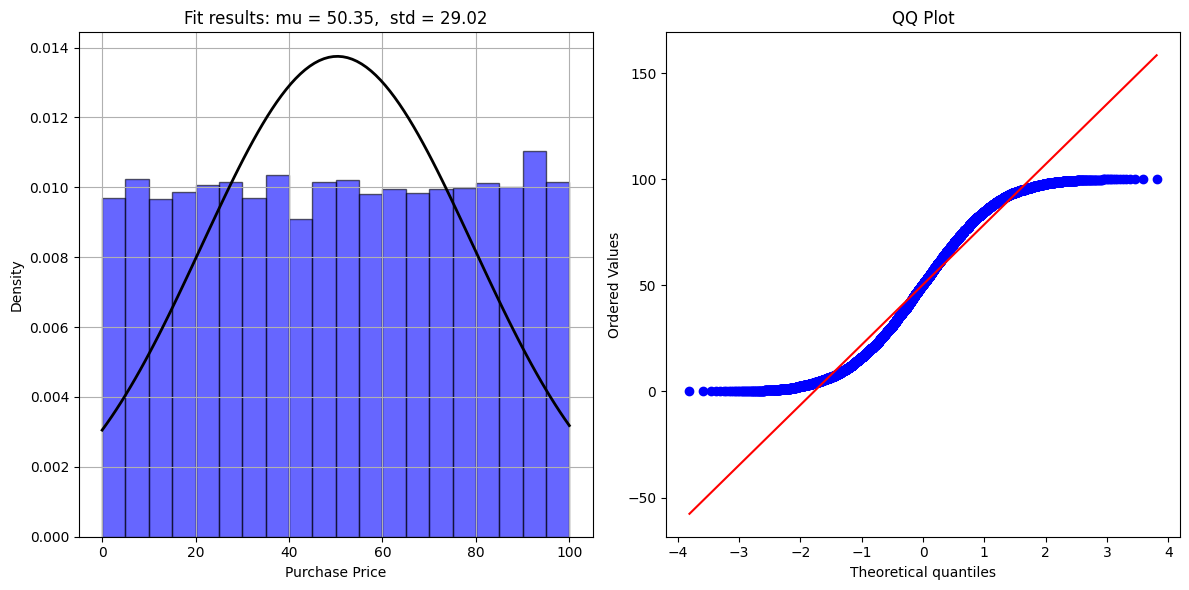

In [62]:
# Calculate mean and standard deviation
mu, std = df['Purchase Price'].mean(), df['Purchase Price'].std()

# Plot normal distribution graph of BloodPressure
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Purchase Price'], bins=20, density=True, alpha=0.6, color='b', edgecolor='black')

# Fit a normal distribution to the data
x = np.linspace(df['Purchase Price'].min(), df['Purchase Price'].max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Purchase Price')
plt.ylabel('Density')
plt.grid(True)

# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(df['Purchase Price'], dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()
